<a href="https://colab.research.google.com/github/Wishmi-Sasika/SLIIT-AI-ML-Stage-1/blob/main/Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


# Importing the modules

In [8]:
import pandas as pd
import nltk

# Importing the dataset

In [9]:
df = pd.read_csv ("/content/drive/MyDrive/Colab Notebooks/Data/spam.csv", encoding = "latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
df.shape

(5572, 5)

In [12]:
df.drop (columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.rename (columns = {'v1': 'class', 'v2': 'sms'}, inplace = True)
df.sample(5)

,class,sms
473,spam,Want 2 get laid tonight? Want real Dogging loc...
1922,ham,I'll be in sch fr 4-6... I dun haf da book in ...
2979,ham,What u mean u almost done? Done wif sleeping? ...
2757,ham,Yo we are watching a movie on netflix
516,spam,Boltblue tones for 150p Reply POLY# or MONO# e...


In [15]:
# Give the details about the two classes
df.groupby ('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [20]:
# Removing duplicates
df = df.drop_duplicates (keep = 'first')

In [21]:
df.groupby ('class').describe()

length                                                         
        count        mean        std   min    25%    50%    75%    max
class                                                                 
ham    4516.0   70.459256  56.358207   2.0   34.0   52.0   90.0  910.0
spam    653.0  137.891271  30.137753  13.0  132.0  149.0  157.0  224.0

# Data visualization

In [23]:
# Get the length of the message
df ["length"] = df ["sms"].apply(len)
df.head()

,class,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

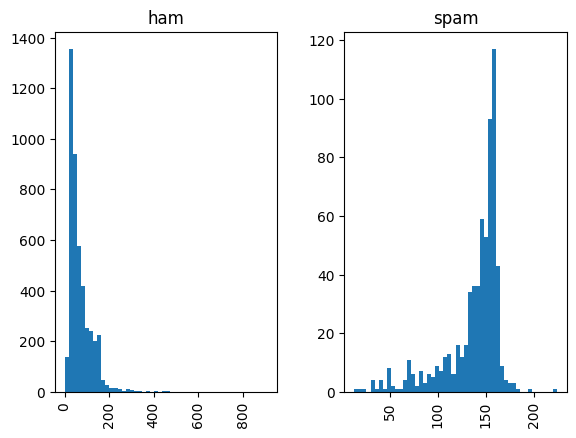

In [25]:
# Visualize the length column according to the class
df.hist (column = 'length', by = 'class', bins = 50)

# Preprocessing

In [26]:
from nltk.stem.porter import PorterStemmer

nltk.download ('stopwords')
from nltk.corpus import stopwords

nltk.download ('punkt')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [27]:
df.head(5)

,class,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Preprocessing Tests:


*   Lower case
*   Tokenization
*   Removing special characters
*   Removing stopwords and punctuations
*   Stemming

In [29]:
import string

def clean_text (text):

  # Lower case
  text = text.lower()

  # Tokenization
  text = nltk.word_tokenize (text)

  # Removing special characters
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  # Removing stopwords
  for i in text:
    if i not in stopwords.words ('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  # Stemming
  for i in text:
    y.append (ps.stem(i))

  return " ".join(y)

In [30]:
# Applying function to each of the sms in the dataset
df ['sms_cleaned'] = df ['sms'].apply (clean_text)

In [31]:
df.head()

,class,sms,length,sms_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


# Feature extraction

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
tf_vec = TfidfVectorizer (max_features = 3000)
x = tf_vec.fit_transform (df ['sms_cleaned']).toarray()

In [34]:
x.shape

(5169, 3000)

In [35]:
y = df ['class'].values

# Learning

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2, random_state = 2)

In [38]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit (x_train, y_train)

MultinomialNB()

In [40]:
from sklearn.metrics import accuracy_score

y_pred = model.predict (x_test)
print (accuracy_score (y_test, y_pred))

0.9709864603481625
